In [10]:
#TEA02 Aditya Aher Assignment 4
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [11]:
boston =load_boston()

In [12]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [16]:
data = pd.DataFrame(boston.data)

In [17]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
data.columns = boston.feature_names
print(data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [21]:
data['PRICE'] = boston.target

In [22]:
data.shape

(506, 14)

In [23]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [24]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [25]:
corr=data.corr()

In [26]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


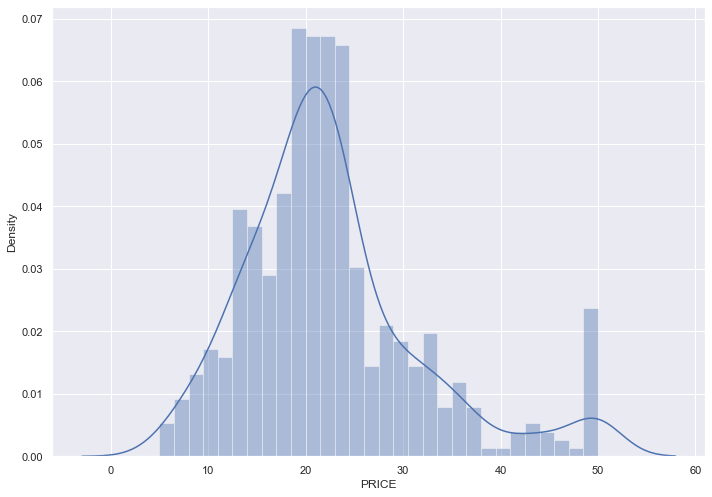

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['PRICE'], bins=30)
plt.show()

<AxesSubplot:>

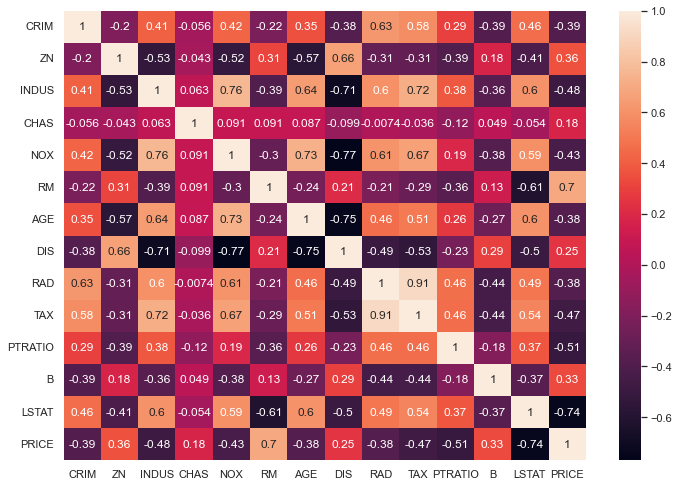

In [28]:
sns.heatmap(corr, annot=True)

In [29]:
X=data.drop(['PRICE'], axis=1)
y=data['PRICE']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [33]:
X_train.shape

(379, 13)

In [34]:
X_test.shape

(127, 13)

In [35]:
y_train.shape

(379,)

In [36]:
y_test.shape

(127,)

In [39]:
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)
y_train_predict = linearReg.predict(X_train)

In [40]:
y_train_predict

array([23.12130698, 26.02685602, 24.85458152, 11.29437156, 23.18838365,
       31.9764137 , 26.42738259, 22.55313445, 35.82583383, 22.32022829,
       23.26866238, 13.39674331, 17.5973932 , 29.98147658, 29.35775238,
       29.58878384, 21.75942077, 16.85995373, 22.15580715, 23.14671947,
       28.23392661, 21.50741508, 21.72489168, 25.25673299, 13.72041936,
       18.6802696 , 19.86082411, 27.69648604, 32.82156608, 10.18429269,
       23.21648183, 22.78282337, 23.90894491, 23.214281  , 28.68602108,
       20.62808675, 20.87450743, 24.10661126, 20.91149778, 25.88037203,
       24.99961381, 19.41491047, 15.82233576, 28.19691058, 17.1968537 ,
       29.95627024, 20.67067743, 34.20276164, 35.70319902, 31.73000374,
       36.9535221 , 30.31594596, 20.10915767, 27.68981552, 27.48255217,
       25.0221863 , 29.26422372, 17.52376713, 34.50928914, 30.57452053,
       36.45869953, 39.56065438,  5.96443797, 27.76107645, 17.83635155,
       24.90292086, 20.05654879, 25.59516393, 20.57266513, 29.55

In [42]:
linearReg.coef_

array([-1.23966388e-01,  6.86370680e-02,  2.78274946e-02,  2.85795639e+00,
       -2.12117712e+01,  3.37769333e+00,  1.62909826e-02, -1.62713090e+00,
        3.49096894e-01, -1.30932318e-02, -8.60798754e-01,  8.21750463e-03,
       -5.94251311e-01])

In [43]:
linearReg.intercept_

39.84826213740724

In [45]:
y_test_predict = linearReg.predict(X_test)

In [46]:
y_test_predict

array([20.53976698, 16.48251732, 35.00180653, 16.03882362, 24.68989524,
       24.75454692, 18.34715542, 36.46451005, 24.26360892, 34.60724224,
       21.27628415, 20.20406163, 31.39154894, 26.06276178, 23.45032093,
       21.791069  , 16.89237525, 25.38702635, 24.90175513, 17.03269187,
       11.88695139, 19.87371858, 13.09096876, 14.18908805, 22.82693635,
       20.56938855, 14.72202884,  8.0795395 , 18.98874413, 19.53346994,
       32.66298581, 20.54787443, 26.10571112, 27.88447582, 18.40525944,
       23.33938858,  7.2082875 , 13.07983883, 24.24255129, 16.40831776,
       22.47765824, 15.97467958, 24.10873496, 20.62421912, 18.78951714,
       33.74138642, 21.16264265, 21.49355201, 19.40885427, 17.30560335,
       24.35946588, 30.91499497, 24.74731461, 19.72739944, 23.30041139,
       21.25610723, 27.15263994, 16.61241474, 26.58238042, 24.17904845,
       32.24324703, 31.37565543, 40.07618966, 21.18519014,  0.61317055,
       16.06879023, 19.74227272, 30.87041528, 13.27962426, 18.88

In [49]:
R2 = r2_score(y_test,y_test_predict)
MAE = mean_absolute_error(y_test,y_test_predict)
MSE = mean_squared_error(y_test,y_test_predict)
RMSE = np.sqrt(MSE)
print("R2", R2)
print("MAE", MAE)
print("MSE", MSE)
print("RMSE", RMSE)

R2 0.709081617528418
MAE 3.7958960633606766
MSE 25.31659820783499
RMSE 5.0315602160597255


Text(0, 0.5, 'Predicted Prices')

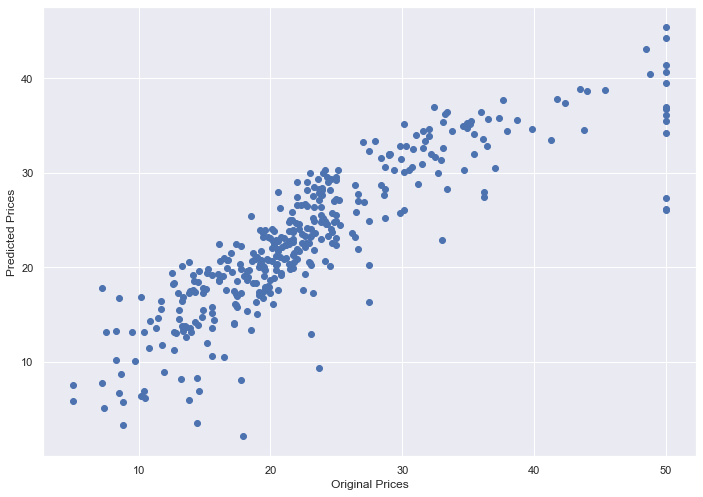

In [51]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("Original Prices")
plt.ylabel("Predicted Prices")


Text(0, 0.5, 'Pridicted Prices')

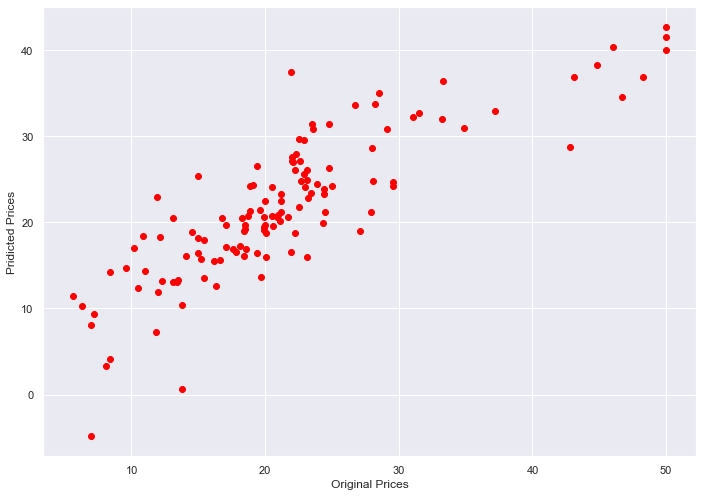

In [53]:
plt.scatter(y_test,y_test_predict,color='red')
plt.xlabel("Original Prices")
plt.ylabel("Pridicted Prices")

In [54]:
linearReg.score(X_test,y_test)

0.709081617528418